<a href="https://colab.research.google.com/github/tawkirahmed/travis-log-mining/blob/develop/tawkir_week_4_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir("/content/drive/My Drive/Data Mining Lab Project")
dataset_path = '/content/drive/My Drive/Data Mining Lab Project/travistorrent_8_2_2017.csv'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
import sys
sys.path.insert(1, '/content/drive/My Drive/DataAnalytics')
import data_helper
import matplotlib.dates as mdates

# pd.describe_option('display')
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 50)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'left')

In [0]:
# style
plt.style.use('fivethirtyeight')
import matplotlib.font_manager
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [0]:
dataset = pd.read_csv(dataset_path, sep=',')
dataset.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3702595, 62)

# Focused Anomaly Analysis

We are going to analyze 'tr_log_num_tests_ok', 'tr_log_num_tests_failed' 'tr_log_num_tests_run', 'tr_log_num_tests_skipped'

In [0]:
target_cols = ['tr_log_num_tests_ok', 'tr_log_num_tests_failed', 'tr_log_num_tests_run', 'tr_log_num_tests_skipped']
key_cols = ['gh_project_name', 'tr_build_id', 'tr_job_id']

In [0]:
# Let's see some stat
target_col = target_cols[0]
def gen_stat(data):
    result = data.describe(percentiles = [0.1, 0.2, 0.5, 0.75, 0.90, 0.95, 0.98, 0.99]).T.reset_index().rename(columns={"index": "feature_name"})
    # result.insert(0, 'gh_project_name', data['gh_project_name'].values[0])
    return result

stat = dataset[[target_col] + key_cols].groupby('gh_project_name').apply(gen_stat).reset_index().sort_values(['max'], ascending = False)

TypeError: ignored

<Figure size 432x288 with 0 Axes>

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


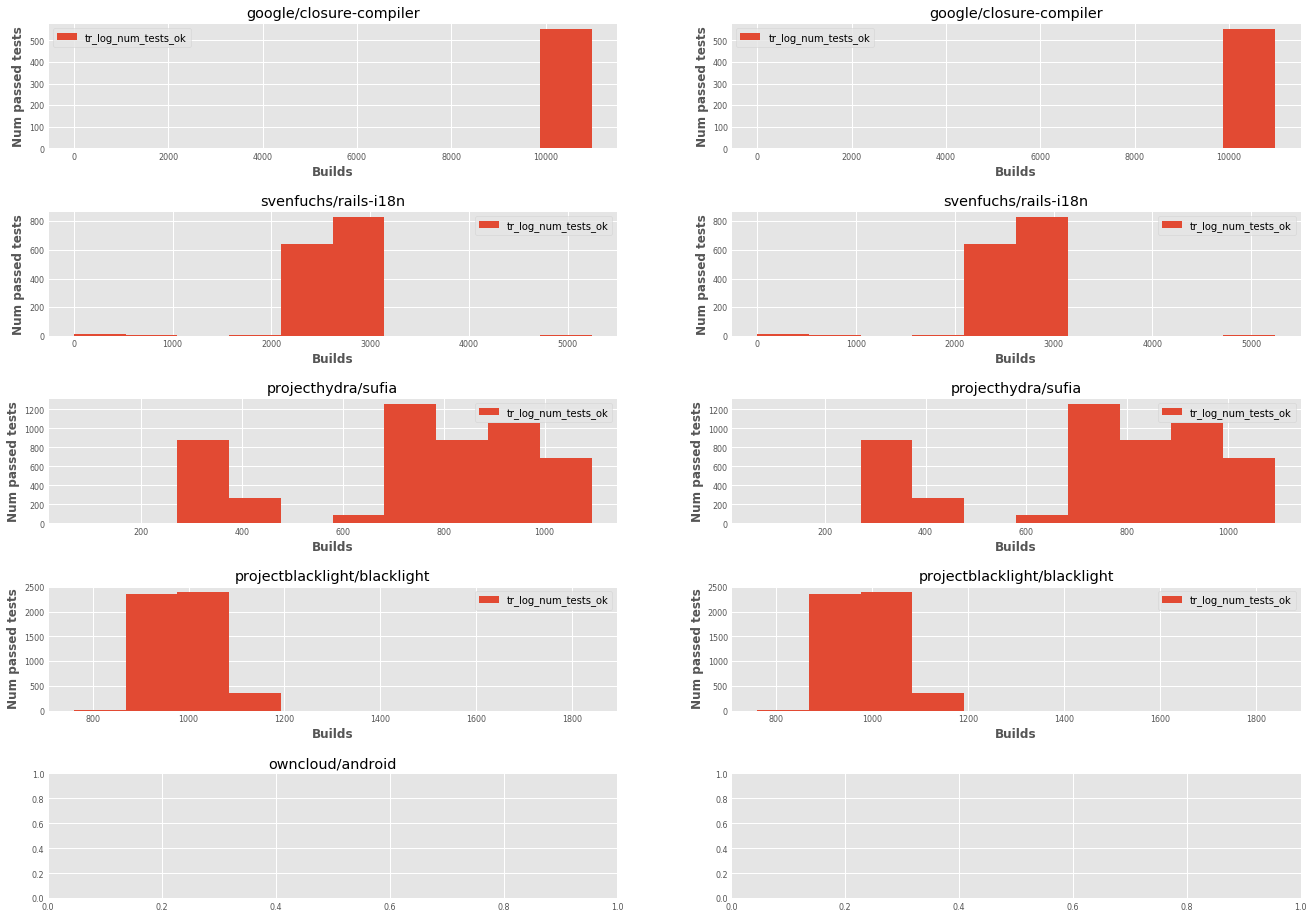

In [0]:
col_name = 'Num passed tests'
plt.tight_layout()
plt.style.use('ggplot')
selected_total = 10 #len(stat)
tem = stat
# tem = stat [ stat['max'] > 50 ].sort_values(['max'], ascending = True)
projects = tem['gh_project_name'].head(selected_total).values
per_row = 2
fig, axs = plt.subplots(selected_total // per_row,per_row)
fig.subplots_adjust(hspace=.5)
for project, ax in zip(projects, axs.flat):
    selected_data = (
        dataset[ dataset['gh_project_name'] == project][['tr_build_id', 'tr_log_num_tests_ok']]
    ).dropna().sort_values(['tr_build_id'], ascending = True)
    ax.title.set_text(project)
    # ax.yaxis.set_label(col_name)
    plot_kind = 'hist' # 'density' # 'scatter'
    selected_data.plot(kind = plot_kind, x = 'tr_build_id', y = 'tr_log_num_tests_ok', ax = ax, figsize = (20, 15))
    # ax.legend().get_texts()[0].set_text(col_name)
    ax.set(xlabel="Builds", ylabel=col_name)

# Distribution

In [0]:
stat.head(5)

,gh_project_name,level_1,feature_name,count,mean,std,min,10%,20%,50%,75%,90%,95%,98%,99%,max
1427,google/closure-compiler,2,tr_job_id,595.000000,124089475.900840,19065991.013384,96799385.000000,101222802.400000,105625838.600000,119679243.000000,143142725.500000,151202940.600000,153786080.500000,155523340.600000,156104779.900000,156676296.000000
1426,google/closure-compiler,1,tr_build_id,595.000000,124089474.643697,19065990.768483,96799384.000000,101222801.400000,105625837.600000,119679242.000000,143142718.000000,151202939.200000,153786078.800000,155523338.600000,156104777.960000,156676294.000000
3434,svenfuchs/rails-i18n,2,tr_job_id,1569.000000,34713892.159975,36363617.426622,981351.000000,2675101.800000,5221710.600000,19842142.000000,52123027.000000,92221284.200000,105677250.400000,129843141.080000,139234412.960000,156675550.000000
3433,svenfuchs/rails-i18n,1,tr_build_id,1569.000000,34713889.700446,36363616.741816,981350.000000,2675100.000000,5221709.000000,19842141.000000,52123024.000000,92221282.000000,105677245.400000,129843139.720000,139234411.000000,156675548.000000
2723,projecthydra/sufia,2,tr_job_id,6457.000000,63829089.149450,45636279.786630,6434846.000000,10932193.600000,22638135.200000,51006265.000000,104916878.000000,135727541.200000,143904511.800000,154900944.760000,155985788.440000,156671242.000000


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


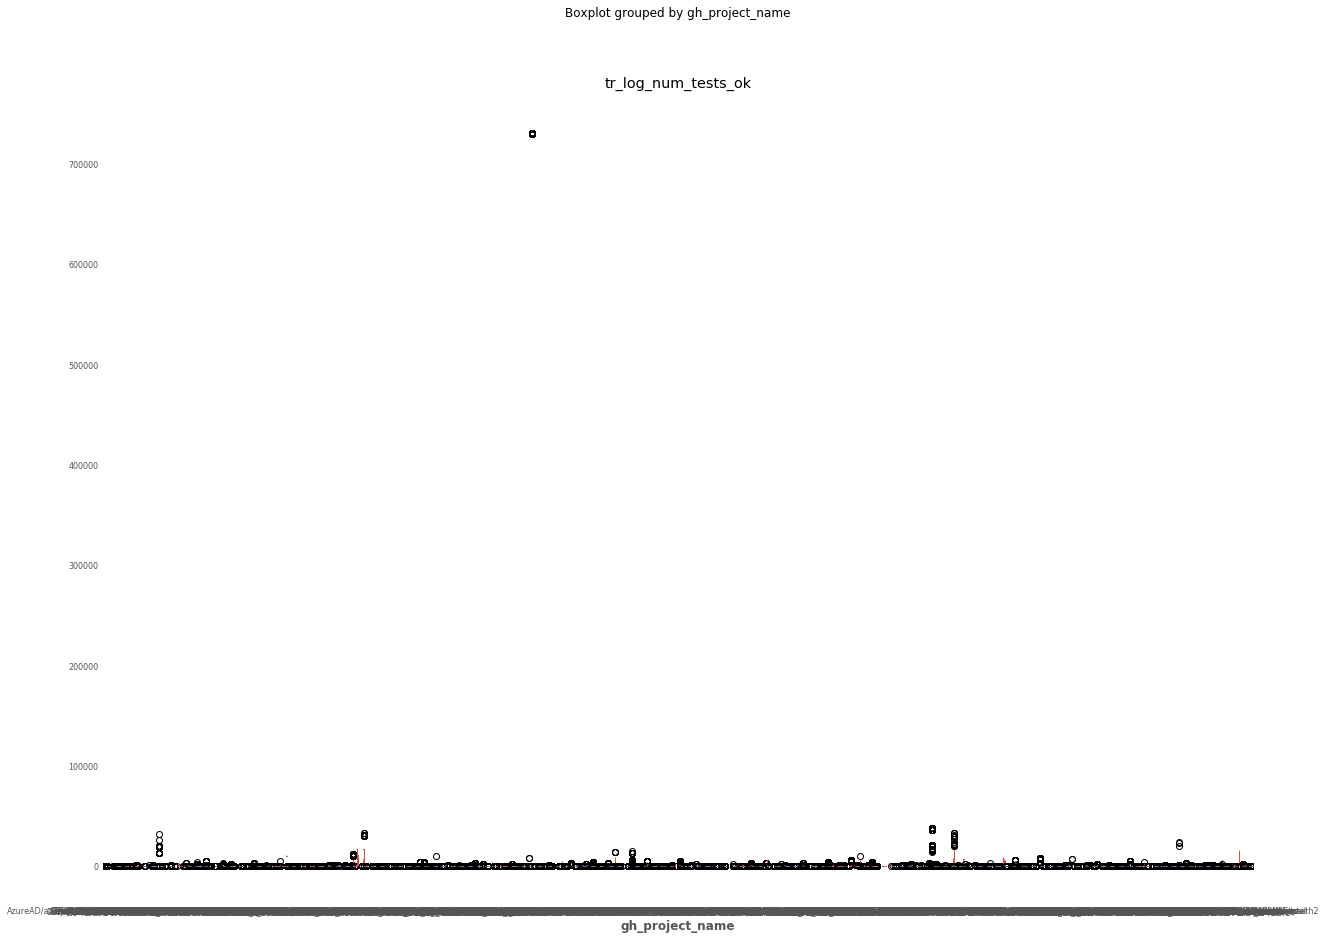

In [0]:
import math
def cubeRoot(x): return math.ceil(x**(1./3.))

# TODO: Choose more appropriate bin strategy since our data is not normal and it does have outliers: Freedman–Diaconis' choice
no_of_bins = 2 * cubeRoot(len(dataset)) # Rice Rule: https://en.wikipedia.org/wiki/Histogram#Rice_Rule

graph_input = (
        # dataset[['tr_build_id', 'tr_log_num_tests_ok']]
        dataset[ dataset['gh_project_name'] == "rspec/rspec-expectations"][['tr_build_id', 'tr_log_num_tests_ok']]
    ).dropna() #.sort_values(['tr_build_id'], ascending = True)

# dataset['tr_log_num_tests_ok'] = dataset['tr_log_num_tests_ok'] / 1000
# dataset[['tr_build_id', 'tr_log_num_tests_ok']].plot.hist(bins = no_of_bins, x = 'tr_build_id', y = 'tr_log_num_tests_ok', figsize = (20, 15), logy = True)
dataset[['gh_project_name', 'tr_log_num_tests_ok']].boxplot(column = 'tr_log_num_tests_ok', by = 'gh_project_name', figsize = (20, 15), grid = True)
# graph_input.plot(kind = 'density', x = 'tr_build_id', y = 'tr_log_num_tests_ok', figsize = (20, 15))

## Identifying outliers

We are going to use IQR for identifying the outliers

In [0]:
def outlier_iqr(s, k=1.5):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    # mark identifier in the series
    data = ((s < lower) | (s>upper))
    return (data, iqr, cut_off, lower, upper)

def calculate_outliers(data, target_cols):
    for target_col in target_cols:
        outlier_col_name = target_col + '_is_outlier'
        col_index = data.columns.get_loc(target_col)
        is_outlier, iqr, cut_off, lower, upper = outlier_iqr(data[target_col])
        data.insert(col_index + 1, outlier_col_name, is_outlier)
        data.insert(col_index + 2, target_col + "_iqr", iqr)
        data.insert(col_index + 3, target_col + "_cut_off", cut_off)
        data.insert(col_index + 4, target_col + "_lower_limit", lower)
        data.insert(col_index + 5, target_col + "_upper_limit", upper)
    
    return data
    
result = dataset.groupby('gh_project_name')[ key_cols + target_cols].apply(calculate_outliers, target_cols)

In [0]:
def gen_stat(data):
    outlier_cols = [col for col in data.columns.values if col.endswith('is_outlier')]
    df = {'tr_build_id': [ data['tr_build_id'].values[0] ]}
    for col in outlier_cols:
        col_name = col.replace('_is_', '_total_')
        df[col_name] = [data[col].sum()]
        actual_col_name = col.replace('_is_outlier', '')

        df[actual_col_name + "_iqr"] = [ data[actual_col_name + "_iqr"].values[0] ]
        df[actual_col_name + "_cut_off"] = [ data[actual_col_name + "_cut_off"].values[0] ]
        df[actual_col_name + "_lower_limit"] = [ data[actual_col_name + "_lower_limit"].values[0] ]
        df[actual_col_name + "_upper_limit"] = [ data[actual_col_name + "_upper_limit"].values[0] ]
    
    return pd.DataFrame(data=df)

result.groupby('gh_project_name').apply(gen_stat).reset_index()

,gh_project_name,level_1,tr_build_id,tr_log_num_tests_ok_total_outlier,tr_log_num_tests_ok_iqr,tr_log_num_tests_ok_cut_off,tr_log_num_tests_ok_lower_limit,tr_log_num_tests_ok_upper_limit,tr_log_num_tests_failed_total_outlier,tr_log_num_tests_failed_iqr,tr_log_num_tests_failed_cut_off,tr_log_num_tests_failed_lower_limit,tr_log_num_tests_failed_upper_limit,tr_log_num_tests_run_total_outlier,tr_log_num_tests_run_iqr,tr_log_num_tests_run_cut_off,tr_log_num_tests_run_lower_limit,tr_log_num_tests_run_upper_limit,tr_log_num_tests_skipped_total_outlier,tr_log_num_tests_skipped_iqr,tr_log_num_tests_skipped_cut_off,tr_log_num_tests_skipped_lower_limit,tr_log_num_tests_skipped_upper_limit
0,47deg/appsly-android-rest,0,4200090,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan
1,AChep/AcDisplay,0,30496591,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan
2,ActiveJpa/activejpa,0,7493595,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan
3,Albacore/albacore,0,2237661,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan
4,ArturT/knapsack,0,29171312,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,zhangkaitao/es,0,4869884,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan
1279,zinenko/vk-ruby,0,331989,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan
1280,zmoazeni/csscss,0,5175224,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan
1281,zquestz/omniauth-google-oauth2,0,8483676,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan


In [0]:
outliers = result[ (result['tr_log_num_tests_ok_is_outlier'] == True) | (result['tr_log_num_tests_failed_is_outlier'] == True) | (result['tr_log_num_tests_run_is_outlier'] == True) |
       (result['tr_log_num_tests_skipped_is_outlier'] == True)].sort_values('tr_log_num_tests_ok', ascending = False)

In [0]:
outliers['gh_project_name'].unique()

array(['owlike/genson', 'everzet/capifony', 'snitko/straight-server',
       'paulasmuth/recommendify'], dtype=object)

In [0]:
outlier_projects = outliers['gh_project_name'].unique()
dataset[dataset['gh_project_name'].isin(outlier_projects)][['gh_project_name'] + target_cols].groupby('gh_project_name').describe()

tr_log_num_tests_ok                                                                            tr_log_num_tests_failed                                                                  tr_log_num_tests_run                                                                             tr_log_num_tests_skipped                                                                
                        count               mean       std        min      25%        50%        75%        max        count                   mean     std       min      25%      50%      75%      max       count                mean       std       min        25%        50%        75%        max        count                    mean     std      min      25%      50%      75%      max      
gh_project_name                                                                                                                                                                                                                                                                                                                                                                                          
everzet/capifony        204.000000          109.102941 18.058585  0.000000 103.500000 110.000000 122.000000 228.000000 204.000000              0.416667 4.399722  0.000000 0.000000 0.000000 0.000000 62.000000 204.000000           109.519608 16.631166 62.000000  104.000000 110.000000 122.000000 228.000000 204.000000               0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
owlike/genson           151.000000          52.655629  108.374170 0.000000 0.000000   0.000000   0.000000   279.000000 151.000000              0.013245 0.162758  0.000000 0.000000 0.000000 0.000000 2.000000  29.000000            274.241379 4.050178  265.000000 274.000000 274.000000 277.000000 279.000000 151.000000               0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
paulasmuth/recommendify 88.000000           79.170455  24.625107  7.000000 84.250000  89.000000  96.000000  99.000000  88.000000               1.590909 10.007625 0.000000 0.000000 0.000000 0.000000 92.000000 88.000000            80.761364  23.229982 14.000000  87.750000  89.000000  96.000000  99.000000  88.000000                6.000000 3.122039 0.000000 5.000000 6.000000 8.000000 17.000000
snitko/straight-server  119.000000          72.605042  15.890098  0.000000 62.000000  71.000000  82.000000  103.000000 129.000000              0.759690 4.898621  0.000000 0.000000 0.000000 0.000000 52.000000 119.000000           73.428571  14.417252 52.000000  62.000000  71.000000  82.000000  103.000000 119.000000               0.899160 0.302390 0.000000 1.000000 1.000000 1.000000 1.000000

In [0]:
outliers.sort_values(['gh_project_name', 'tr_build_id', 'tr_job_id'], ascending = True).to_csv('/content/drive/My Drive/DataAnalytics/outlier_report_1.csv')

In [0]:
project = 'paulasmuth/recommendify'
r = (dataset[ dataset['gh_project_name'] == project ][['gh_project_name','tr_build_id',
                                                       'git_trigger_commit', 'git_num_all_built_commits', 'gh_build_started_at', 'tr_job_id',
                                                       'tr_log_num_tests_ok', 'tr_log_num_tests_failed', 'tr_log_num_tests_run', 'tr_log_num_tests_skipped']]
     .sort_values(['gh_project_name', 'tr_build_id', 'tr_job_id'], ascending = True))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(len(r))
    print(r)

88
        gh_project_name           tr_build_id git_trigger_commit                         git_num_all_built_commits gh_build_started_at   tr_job_id  tr_log_num_tests_ok  tr_log_num_tests_failed  tr_log_num_tests_run  tr_log_num_tests_skipped
93334    paulasmuth/recommendify  595587       07c31c2fc6329bd17b0f68a4b796f16cecf8d653  20                         2012-01-29 20:56:42  595588    14.000000            0.000000                 14.000000             0.000000                 
93338    paulasmuth/recommendify  595628       52d6668a4f35c5f746d56ba726346d911f108d33  1                          2012-01-29 21:06:36  595629    16.000000            0.000000                 16.000000             0.000000                 
93346    paulasmuth/recommendify  595697       c9e46746164eea44fd276c7b9309d39674b1e85b  1                          2012-01-29 21:22:51  595698    20.000000            0.000000                 20.000000             0.000000                 
93356    paulasmuth/recommendify 

In [0]:
gr = dataset[ dataset['gh_project_name'] == project ][['gh_build_started_at', 'tr_log_num_tests_ok']].reset_index(drop=True)


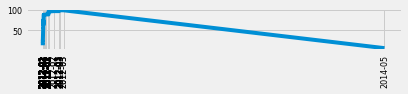

In [0]:
gr['gh_build_started_at'] = pd.to_datetime(gr['gh_build_started_at'])

# gr.plot(kind = 'line', figsize= (15, 10))

# gr.plot(kind ='line',x = 'gh_build_started_at', y = 'tr_log_num_tests_ok')
# gr.plot(kind = 'hist', bins = 2)
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
xxx = gr['gh_build_started_at'].apply(lambda x: x.strftime('%Y-%m-%d')) 

xfmt = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.xticks( gr['gh_build_started_at'],rotation=90)
# plt.gcf().autofmt_xdate()
plt.plot(gr.set_index('gh_build_started_at'))

In [0]:

gr['gh_build_started_at'].apply(lambda x: x.strftime('%Y-%m-%d')) 

0     2012-01-29
1     2012-01-29
2     2012-01-29
3     2012-01-29
4     2012-01-29
         ...    
83    2012-03-12
84    2012-03-12
85    2012-03-20
86    2012-03-20
87    2014-05-08
Name: gh_build_started_at, Length: 88, dtype: object

# Resoning of outlier behaviors

## Verifying that number of test run = number of test passed + no of tests failed

In [0]:
# ['tr_log_num_tests_ok', 'tr_log_num_tests_failed', 'tr_log_num_tests_run', 'tr_log_num_tests_skipped']
v_data = dataset[ ['tr_log_num_tests_ok', 'tr_log_num_tests_failed', 'tr_log_num_tests_run', 'tr_log_num_tests_skipped']]
v_data [ 'total']  = dataset['tr_log_num_tests_ok'] + dataset['tr_log_num_tests_failed']
v_data.sort_values(['tr_log_num_tests_failed'], ascending = False)
v_data = v_data.dropna()
v_data[ v_data['total'] != v_data['tr_log_num_tests_run'] ]

# Descriptive tasks

In [0]:
## Relation between line of code and number of tests

In [0]:
data

In [0]:
d1_data = dataset[['gh_sloc', 'tr_log_num_tests_run', 'tr_log_num_tests_skipped']]
d1_data['total_tests'] = dataset['tr_log_num_tests_run'] + dataset['tr_log_num_tests_skipped']
d1_data[['gh_sloc', 'total_tests']].corr()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gh_sloc,total_tests
gh_sloc,1.000000,0.054839
total_tests,0.054839,1.000000


In [0]:
d1_data_sample = d1_data.sample(100)

In [0]:
d1_data_sample.plot(kind = 'point', y = 'total_tests', figsize = (20, 15))

ValueError: ignored

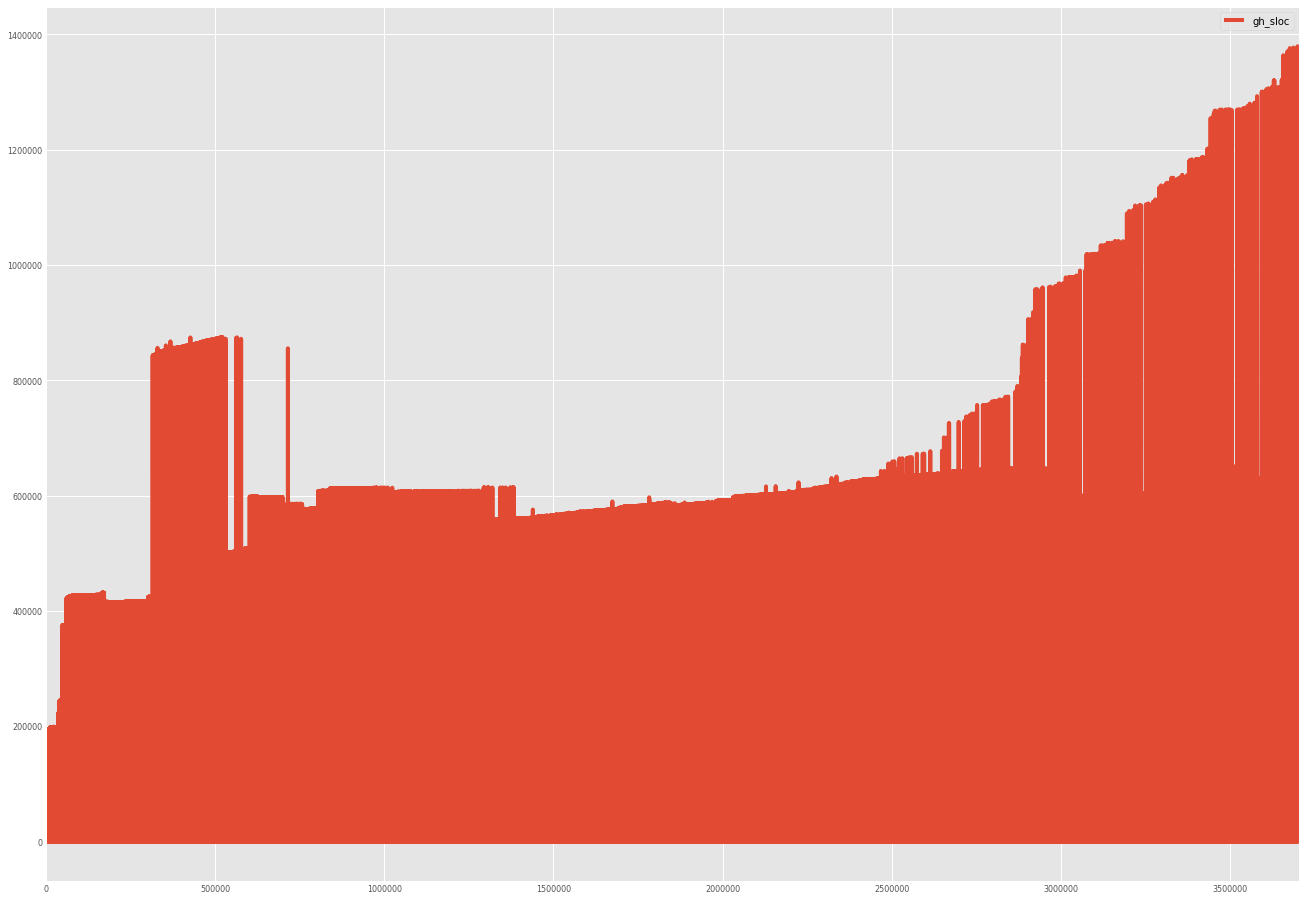

In [0]:
d1_data.plot(kind = 'line', y = 'gh_sloc', figsize = (20, 15))